In [9]:
import xml.etree.ElementTree as ET
import pandas as pd

def xml_file_to_dataframe(file_path):
    """
    Convert an XML file to a Pandas DataFrame.
    
    Args:
        file_path (str): Path to the XML file.

    Returns:
        pd.DataFrame: DataFrame with extracted data.
    """
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # List to hold parsed data
    records = []

    # Iterate through each <Record> in the XML
    for record in root.findall('Record'):
        record_data = {}
        
        # Extract attributes of the <Record>
        for attr, value in record.attrib.items():
            record_data[attr] = value
        
        # Extract metadata entries if present
        for metadata in record.findall('MetadataEntry'):
            key = metadata.get('key')
            value = metadata.get('value')
            record_data[key] = value

        # Add the parsed record to the list
        records.append(record_data)

    # Convert list of records into a DataFrame
    df = pd.DataFrame(records)
    return df

def separate_dataframes(df):
    """
    Separate the DataFrame into menstrual flow and other types.

    Args:
        df (pd.DataFrame): Input DataFrame.

    Returns:
        tuple: (menstrual_flow_df, other_df)
    """
    # Filter rows for Menstrual Flow
    menstrual_flow_df = df[df['type'] == 'HKCategoryTypeIdentifierMenstrualFlow']
    
    # Filter all other types
    other_df = df[df['type'] != 'HKCategoryTypeIdentifierMenstrualFlow']
    
    return menstrual_flow_df, other_df

# Example usage
file_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with your XML file path
df = xml_file_to_dataframe(file_path)

# Separate into two DataFrames
#menstrual_flow_df, other_df = separate_dataframes(df)

type = df['type'].unique()
type_dict = {}
for i in type:
    type_dict[i] = pd.Series(df[df['type'] == i]['startDate'].values, index=df[df['type'] == i]['endDate'])


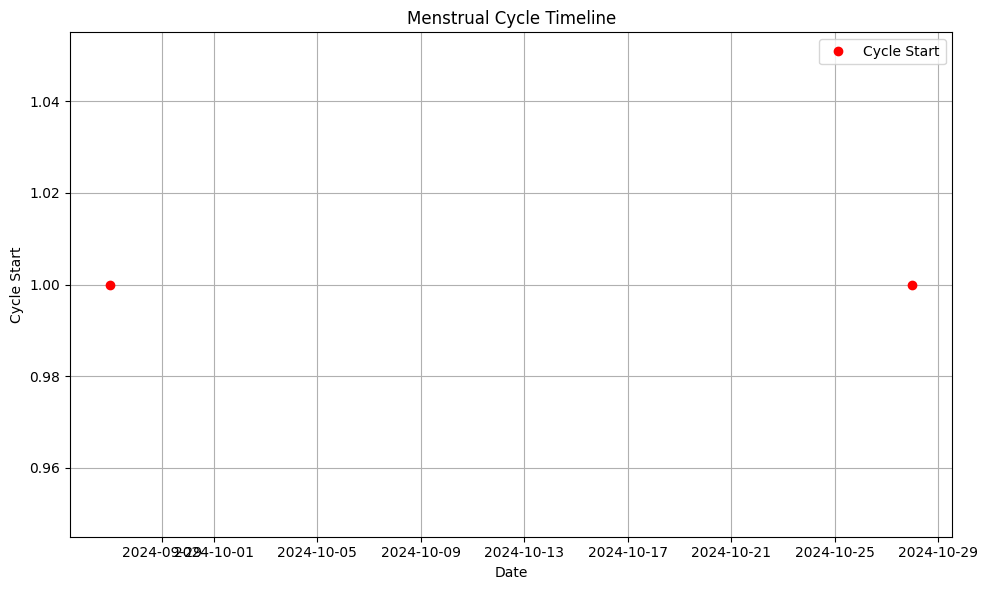

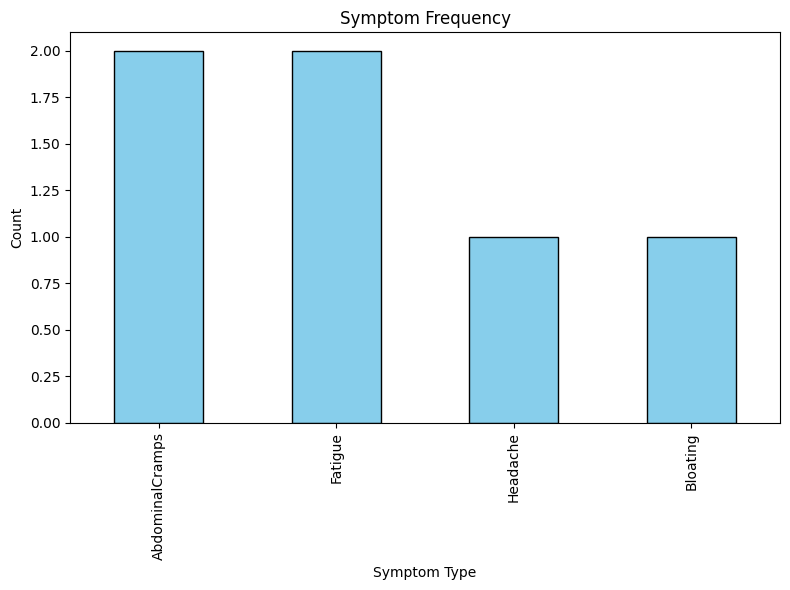

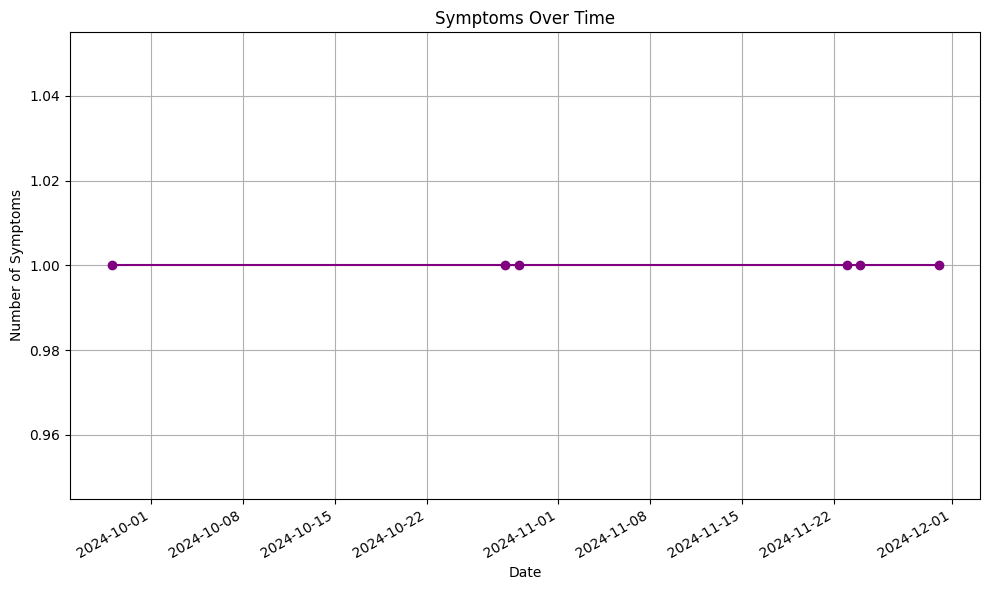

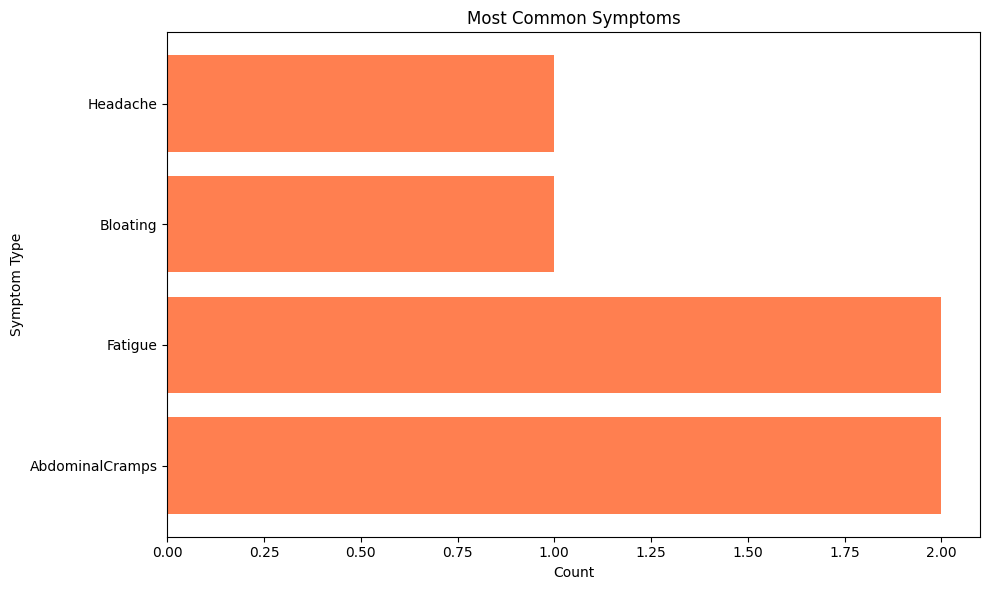

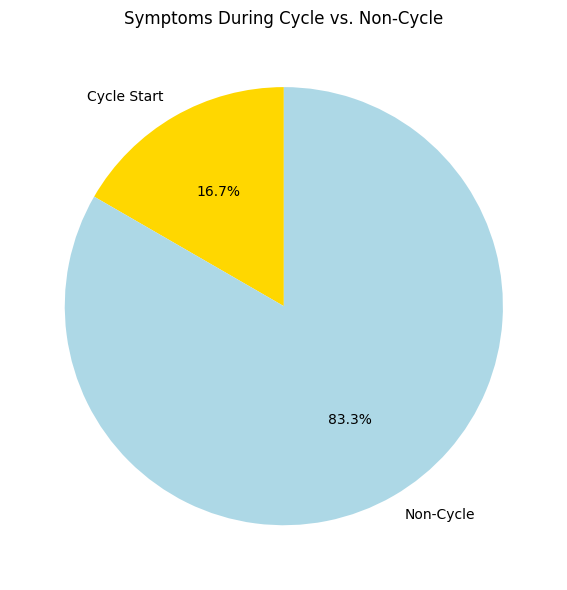

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Simulated Menstrual Cycle Data
cycle_data = [
    {"startDate": "2024-09-27", "endDate": "2024-09-27", "type": "MenstrualFlow", "cycleStart": 1},
    {"startDate": "2024-09-28", "endDate": "2024-09-28", "type": "MenstrualFlow", "cycleStart": 0},
    {"startDate": "2024-10-28", "endDate": "2024-10-28", "type": "MenstrualFlow", "cycleStart": 1},
    {"startDate": "2024-10-29", "endDate": "2024-10-29", "type": "MenstrualFlow", "cycleStart": 0},
    # Add more cycle records here...
]

# Symptom Data (Simulated)
symptom_data = [
    {"date": "2024-09-28", "type": "AbdominalCramps"},
    {"date": "2024-10-28", "type": "Headache"},
    {"date": "2024-10-29", "type": "Fatigue"},
    {"date": "2024-11-23", "type": "AbdominalCramps"},
    {"date": "2024-11-24", "type": "Bloating"},
    {"date": "2024-11-30", "type": "Fatigue"},
    # Add more symptom records here...
]

# Convert to DataFrames
cycle_df = pd.DataFrame(cycle_data)
symptom_df = pd.DataFrame(symptom_data)

# Ensure dates are datetime objects
cycle_df['startDate'] = pd.to_datetime(cycle_df['startDate'])
symptom_df['date'] = pd.to_datetime(symptom_df['date'])

# Visualization 1: Menstrual Cycle Timeline
cycle_starts = cycle_df[cycle_df['cycleStart'] == 1]['startDate']
plt.figure(figsize=(10, 6))
plt.plot(cycle_starts, [1] * len(cycle_starts), 'ro', label="Cycle Start")
plt.title('Menstrual Cycle Timeline')
plt.xlabel('Date')
plt.ylabel('Cycle Start')
plt.grid()
plt.tight_layout()
plt.legend()
plt.show()

# Visualization 2: Symptom Frequency (Count by Type)
symptom_count = symptom_df['type'].value_counts()

plt.figure(figsize=(8, 6))
symptom_count.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Symptom Frequency')
plt.xlabel('Symptom Type')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Visualization 3: Symptoms Over Time (Count by Day)
symptoms_over_time = symptom_df.groupby('date').size()

plt.figure(figsize=(10, 6))
symptoms_over_time.plot(kind='line', marker='o', color='purple')
plt.title('Symptoms Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Symptoms')
plt.grid()
plt.tight_layout()
plt.show()

# Visualization 4: Most Common Symptom Occurrences
top_symptom_dates = symptom_df.groupby('type').size().reset_index(name='Count')
top_symptom_dates = top_symptom_dates.sort_values(by='Count', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(top_symptom_dates['type'], top_symptom_dates['Count'], color='coral')
plt.title('Most Common Symptoms')
plt.xlabel('Count')
plt.ylabel('Symptom Type')
plt.tight_layout()
plt.show()

# Visualization 5: Symptoms vs. Cycle Phases
# Merge cycle phase data with symptoms
symptom_df['cyclePhase'] = symptom_df['date'].apply(lambda x: 'Cycle Start' if x in cycle_starts.values else 'Non-Cycle')
phase_symptom_count = symptom_df.groupby('cyclePhase').size()

plt.figure(figsize=(8, 6))
phase_symptom_count.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['gold', 'lightblue'])
plt.title('Symptoms During Cycle vs. Non-Cycle')
plt.ylabel('')
plt.tight_layout()
plt.savefig("noncycle-cycle_synmptoms")
plt.show()


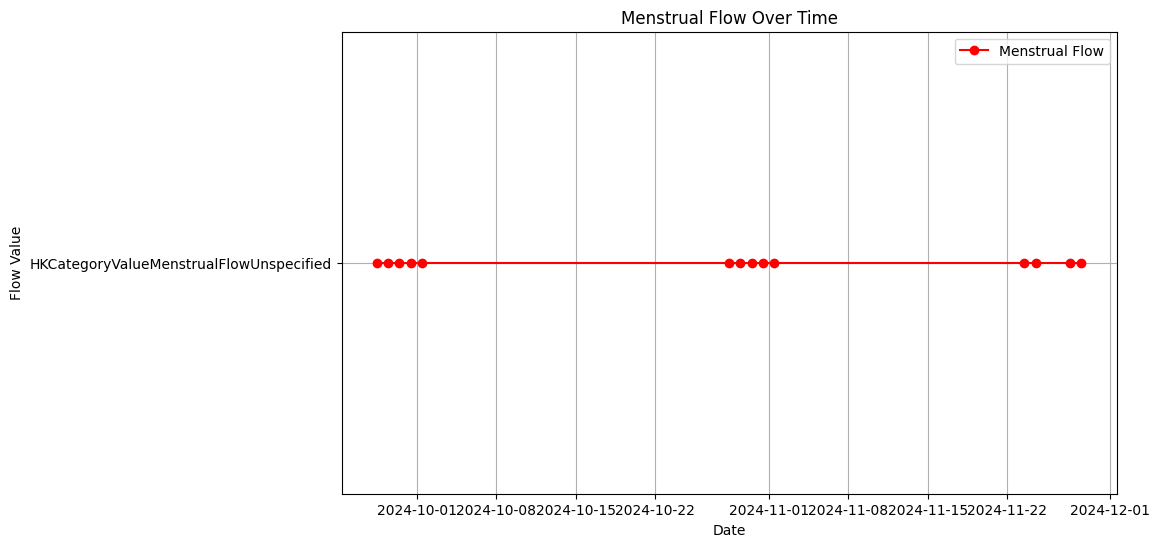

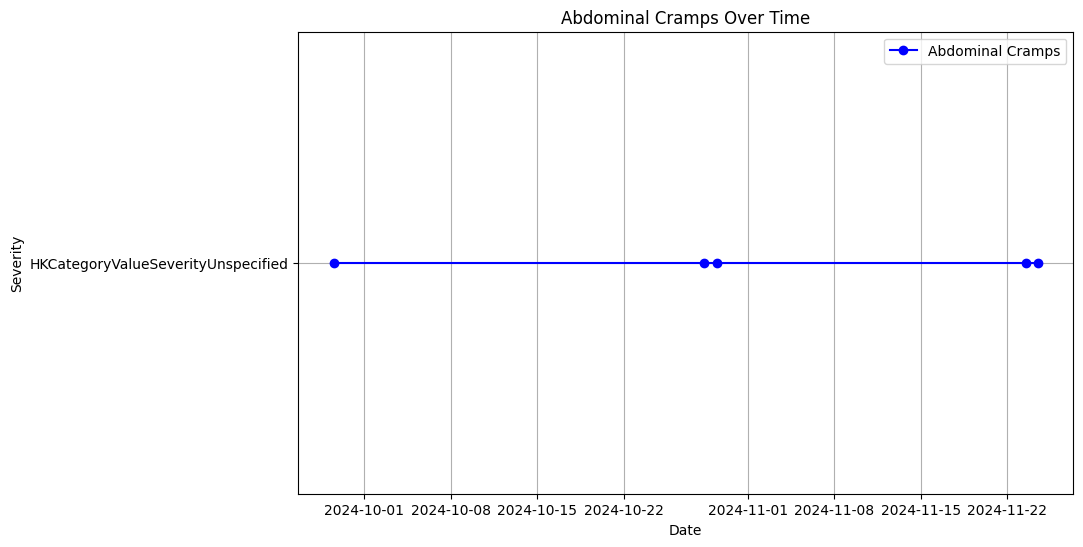

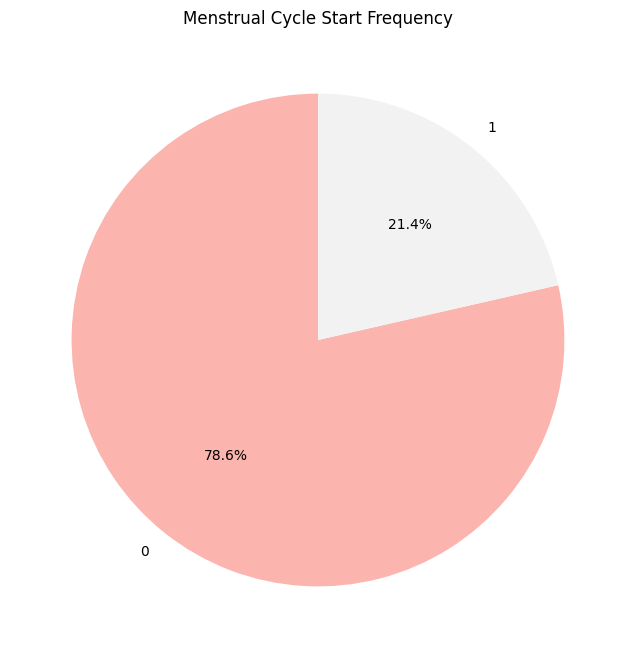

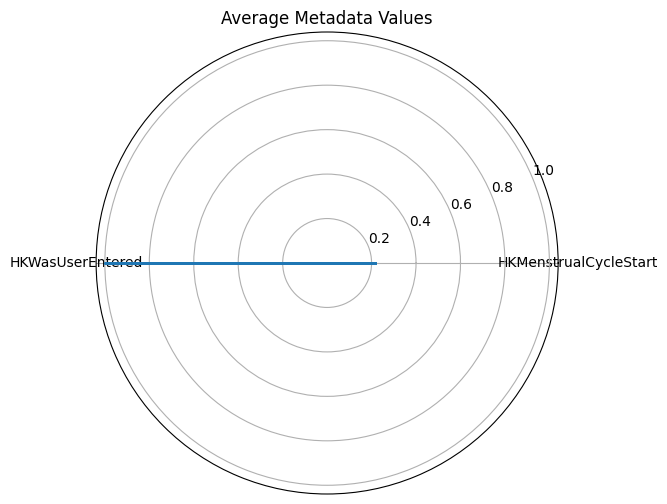

In [12]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from math import pi
import numpy as np

# Parse XML and convert to DataFrame
def xml_to_dataframe(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    records = []

    for record in root.findall('Record'):
        record_data = {key: record.get(key) for key in record.attrib.keys()}
        for metadata in record.findall('MetadataEntry'):
            key = metadata.get('key')
            value = metadata.get('value')
            record_data[key] = value
        records.append(record_data)

    df = pd.DataFrame(records)
    df['startDate'] = pd.to_datetime(df['startDate'])
    if 'endDate' in df.columns:
        df['endDate'] = pd.to_datetime(df['endDate'])
    return df

# File path
file_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with your XML file path
df = xml_to_dataframe(file_path)

# Filter Menstrual Flow Data
menstrual_flow_df = df[df['type'] == 'HKCategoryTypeIdentifierMenstrualFlow']
abdominal_cramps_df = df[df['type'] == 'HKCategoryTypeIdentifierAbdominalCramps']

# Visualization 1: Menstrual Flow Over Time
plt.figure(figsize=(10, 6))
plt.plot(menstrual_flow_df['startDate'], menstrual_flow_df['value'], marker='o', color='red', label='Menstrual Flow')
plt.title('Menstrual Flow Over Time')
plt.xlabel('Date')
plt.ylabel('Flow Value')
plt.grid()
plt.legend()
plt.savefig("mensturalflowtime.png")
plt.show()

# Visualization 2: Abdominal Cramps Over Time
plt.figure(figsize=(10, 6))
plt.plot(abdominal_cramps_df['startDate'], abdominal_cramps_df['value'], marker='o', color='blue', label='Abdominal Cramps')
plt.title('Abdominal Cramps Over Time')
plt.xlabel('Date')
plt.ylabel('Severity')
plt.grid()
plt.legend()
plt.show()


# Visualization 4: Pie Chart for Cycle Start Frequency
cycle_start_counts = menstrual_flow_df['HKMenstrualCycleStart'].value_counts()
cycle_start_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='Pastel1', figsize=(8, 8))
plt.title('Menstrual Cycle Start Frequency')
plt.ylabel('')
plt.show()

# Visualization 5: Radar Chart for Metadata Averages
metadata_keys = ['HKMenstrualCycleStart', 'HKWasUserEntered']
metadata_avg = {key: menstrual_flow_df[key].astype(float).mean() for key in metadata_keys}
values = list(metadata_avg.values())
values.append(values[0])  # Close the radar chart

angles = [n / float(len(metadata_keys)) * 2 * pi for n in range(len(metadata_keys))]
angles += angles[:1]

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], metadata_keys)

ax.plot(angles, values, linewidth=2, linestyle='solid')
ax.fill(angles, values, alpha=0.4)
plt.title('Average Metadata Values')
plt.show()


In [6]:
print(df)


                                                <Root>
0    <Record type="HKCategoryTypeIdentifierMenstrua...
1        creationDate="2024-09-27 18:25:04 +0300" s...
2        endDate="2024-09-27 12:00:00 +0300" value=...
3        <MetadataEntry key="HKMenstrualCycleStart"...
4        <MetadataEntry key="HKWasUserEntered" valu...
..                                                 ...
348      creationDate="2024-10-30 11:16:15 +0300" s...
349      endDate="2024-10-30 12:00:00 +0300" value=...
350                                          </Record>
351  <MetadataEntry key="HKWasUserEntered" value="1...
352                                            </Root>

[353 rows x 1 columns]


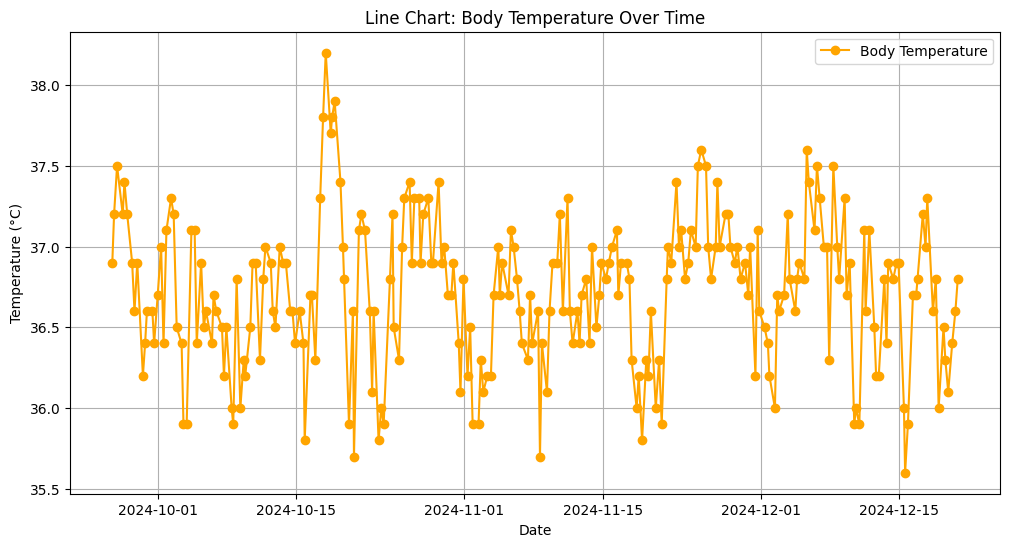

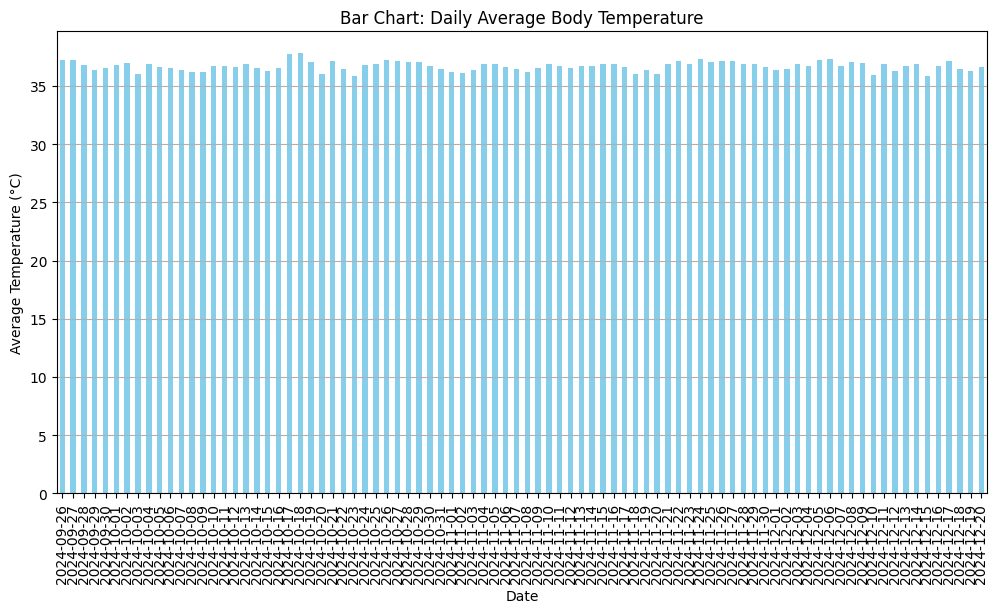

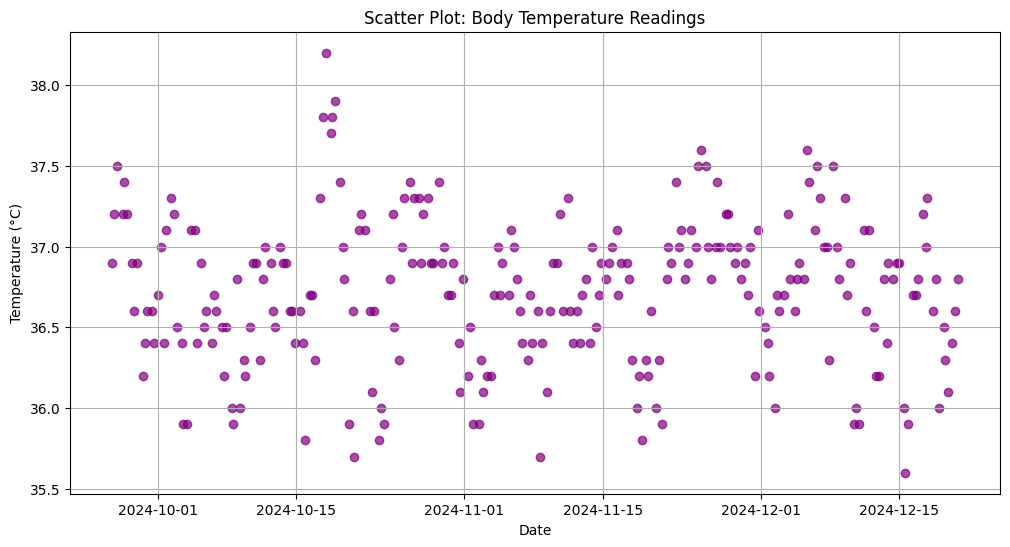

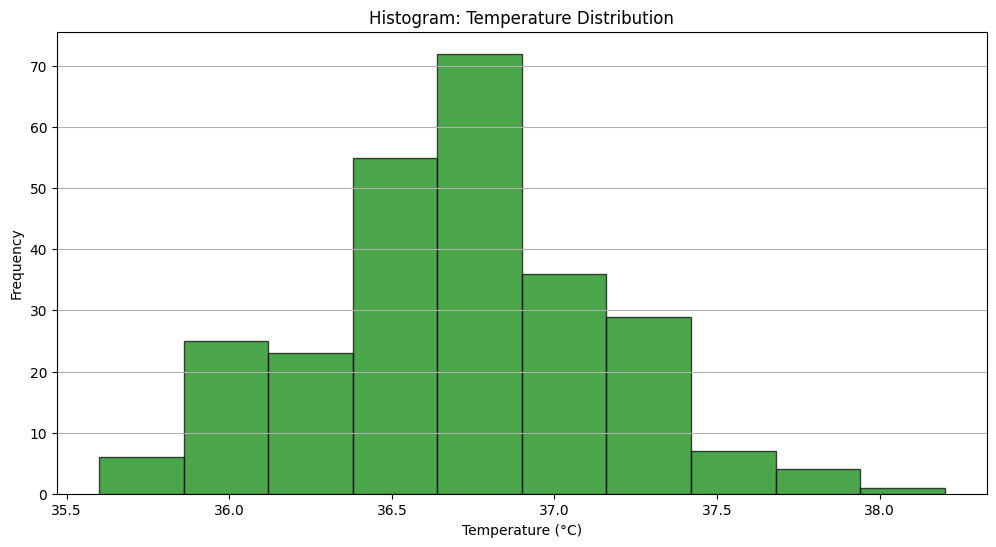

/var/folders/x2/lvrpg7vx3x35t6cwtj7gfq2r0000gn/T/ipykernel_48103/868934462.py:60: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(temperature_data_df['temperature'], shade=True, color='blue')


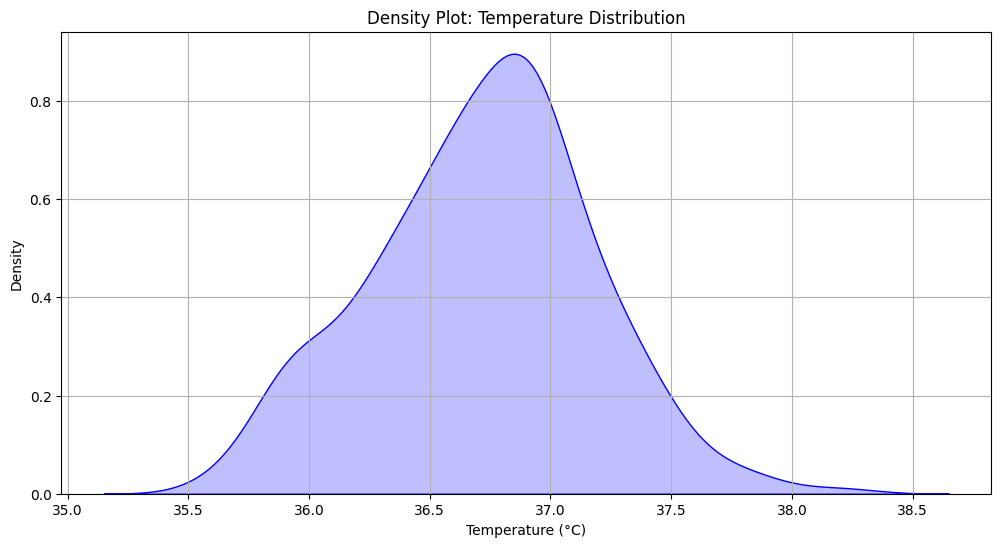

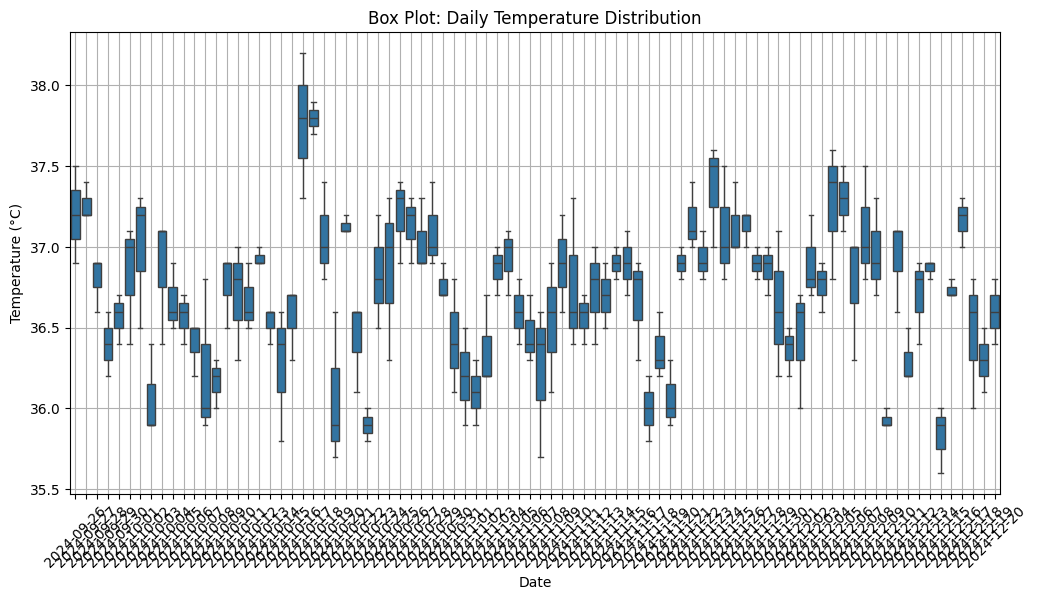

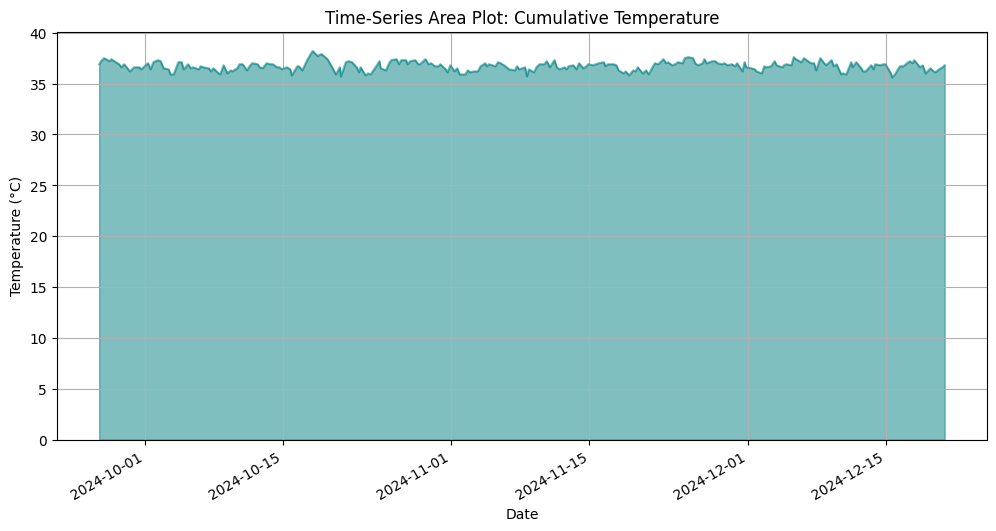

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# File path for temperature data JSON file
file_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/dailybodytemp.json"  # Update this with the actual path to the JSON file

try:
    # Read the JSON file
    temperature_data_df = pd.read_json(file_path)

    # Convert date column to datetime
    temperature_data_df['date'] = pd.to_datetime(temperature_data_df['date'])

    # Daily Average Temperature
    daily_avg_temp = temperature_data_df.groupby(temperature_data_df['date'].dt.date)['temperature'].mean()

    # Line Chart
    plt.figure(figsize=(12, 6))
    plt.plot(temperature_data_df['date'], temperature_data_df['temperature'], marker='o', label='Body Temperature', color='orange')
    plt.title('Line Chart: Body Temperature Over Time')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid()
    plt.legend()
    plt.savefig("linechart_dailytemperaturedist.png")
    plt.show()

    # Bar Chart
    plt.figure(figsize=(12, 6))
    daily_avg_temp.plot(kind='bar', color='skyblue')
    plt.title('Bar Chart: Daily Average Body Temperature')
    plt.xlabel('Date')
    plt.ylabel('Average Temperature (°C)')
    plt.grid(axis='y')
    plt.show()

    # Scatter Plot
    plt.figure(figsize=(12, 6))
    plt.scatter(temperature_data_df['date'], temperature_data_df['temperature'], color='purple', alpha=0.7)
    plt.title('Scatter Plot: Body Temperature Readings')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid()
    plt.savefig("bodytemp_scatterplot.png")
    plt.show()

    # Histogram
    plt.figure(figsize=(12, 6))
    plt.hist(temperature_data_df['temperature'], bins=10, color='green', edgecolor='black', alpha=0.7)
    plt.title('Histogram: Temperature Distribution')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')
    plt.grid(axis='y')
    plt.savefig("histogram_bodytemperature.png")
    plt.show()

    # Density Plot
    plt.figure(figsize=(12, 6))
    sns.kdeplot(temperature_data_df['temperature'], shade=True, color='blue')
    plt.title('Density Plot: Temperature Distribution')
    plt.xlabel('Temperature (°C)')
    plt.grid()
    plt.show()

    # Box Plot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=temperature_data_df['date'].dt.date, y=temperature_data_df['temperature'])
    plt.title('Box Plot: Daily Temperature Distribution')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    plt.grid()
    plt.savefig("boxplot_dailytemperaturedist.png")
    plt.show()

    # Time-Series Area Plot
    plt.figure(figsize=(12, 6))
    temperature_data_df.set_index('date')['temperature'].plot(kind='area', alpha=0.5, color='teal')
    plt.title('Time-Series Area Plot: Cumulative Temperature')
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.grid()
    plt.show()

except FileNotFoundError:
    print("The specified file path does not exist. Please check the file path and try again.")
except Exception as e:
    print(f"An error occurred: {e}")


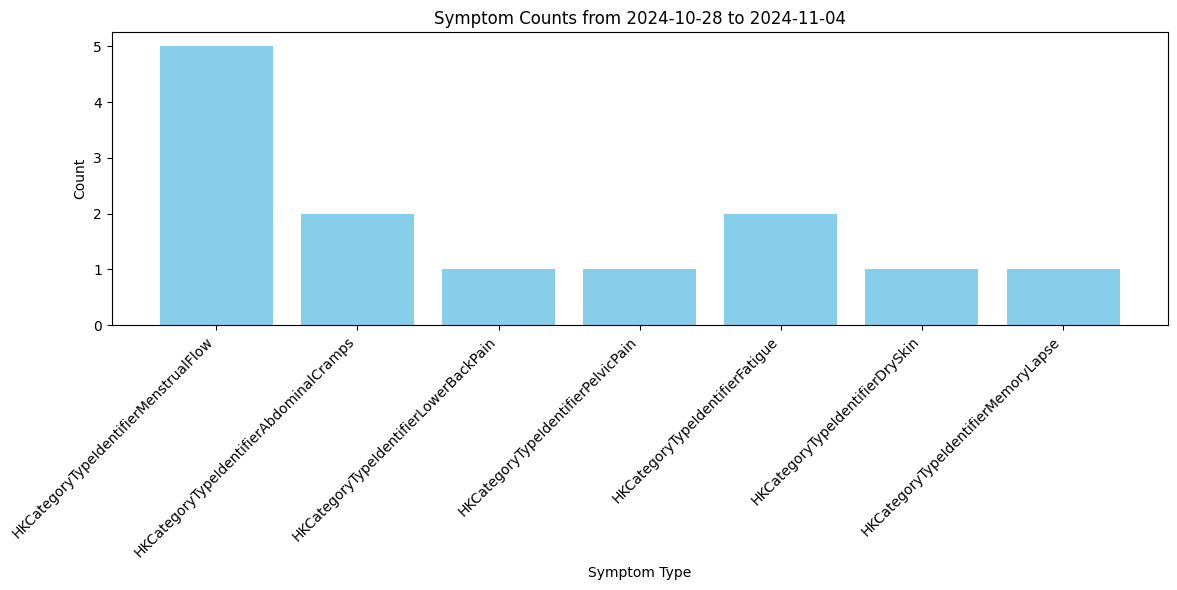

In [5]:

import xml.etree.ElementTree as ET
from datetime import datetime, timedelta
from collections import Counter
import matplotlib.pyplot as plt

# Load XML file
xml_file =  "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with the correct file path
tree = ET.parse(xml_file)
root = tree.getroot()

# Specify the week range (e.g., start from a specific date)
start_of_week = datetime.strptime("2024-10-28", "%Y-%m-%d")  # Example start date
end_of_week = start_of_week + timedelta(days=7)

# Initialize a counter for symptoms
symptom_counter = Counter()

# Process each <Record> in the XML
for record in root.findall("Record"):
    record_type = record.get("type")
    start_date = datetime.strptime(record.get("startDate")[:10], "%Y-%m-%d")  # Extract date
    
    # Check if the record falls within the week range
    if start_of_week <= start_date < end_of_week:
        symptom_counter[record_type] += 1

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(symptom_counter.keys(), symptom_counter.values(), color='skyblue')
plt.title(f"Symptom Counts from {start_of_week.date()} to {end_of_week.date()}")
plt.xlabel("Symptom Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("symptom_counter")
plt.show()

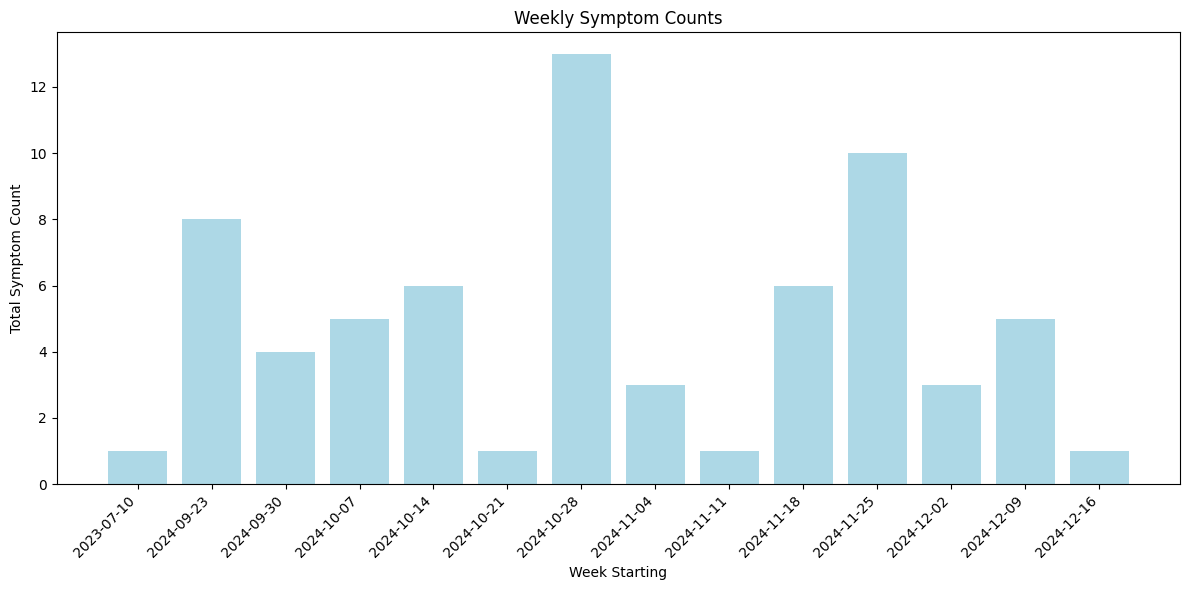

Weekly Symptom Counts:
Week starting 2023-07-10: 1 symptoms
Week starting 2024-09-23: 8 symptoms
Week starting 2024-09-30: 4 symptoms
Week starting 2024-10-07: 5 symptoms
Week starting 2024-10-14: 6 symptoms
Week starting 2024-10-21: 1 symptoms
Week starting 2024-10-28: 13 symptoms
Week starting 2024-11-04: 3 symptoms
Week starting 2024-11-11: 1 symptoms
Week starting 2024-11-18: 6 symptoms
Week starting 2024-11-25: 10 symptoms
Week starting 2024-12-02: 3 symptoms
Week starting 2024-12-09: 5 symptoms
Week starting 2024-12-16: 1 symptoms


In [7]:
import xml.etree.ElementTree as ET
from datetime import datetime, timedelta
from collections import defaultdict
import matplotlib.pyplot as plt

xml_file =  "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with your XML file path
tree = ET.parse(xml_file)
root = tree.getroot()

# Function to calculate the start of the week for a given date
def get_week_start(date):
    return date - timedelta(days=date.weekday())

# Dictionary to store the weekly counts
weekly_counts = defaultdict(int)

# Process each <Record> in the XML
for record in root.findall("Record"):
    start_date = datetime.strptime(record.get("startDate")[:10], "%Y-%m-%d")  # Extract the date
    week_start = get_week_start(start_date)  # Get the start of the week
    weekly_counts[week_start] += 1  # Increment the count for the week

# Convert to sorted list for easier visualization
weekly_counts_sorted = sorted(weekly_counts.items())

# Separate weeks and counts for plotting
weeks = [week.strftime("%Y-%m-%d") for week, count in weekly_counts_sorted]
counts = [count for week, count in weekly_counts_sorted]

# Plot the results
plt.figure(figsize=(12, 6))
plt.bar(weeks, counts, color="lightblue")
plt.title("Weekly Symptom Counts")
plt.xlabel("Week Starting")
plt.ylabel("Total Symptom Count")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("symptomsinweek")

plt.show()

# Print weekly data
print("Weekly Symptom Counts:")
for week, count in weekly_counts_sorted:
    print(f"Week starting {week.strftime('%Y-%m-%d')}: {count} symptoms")

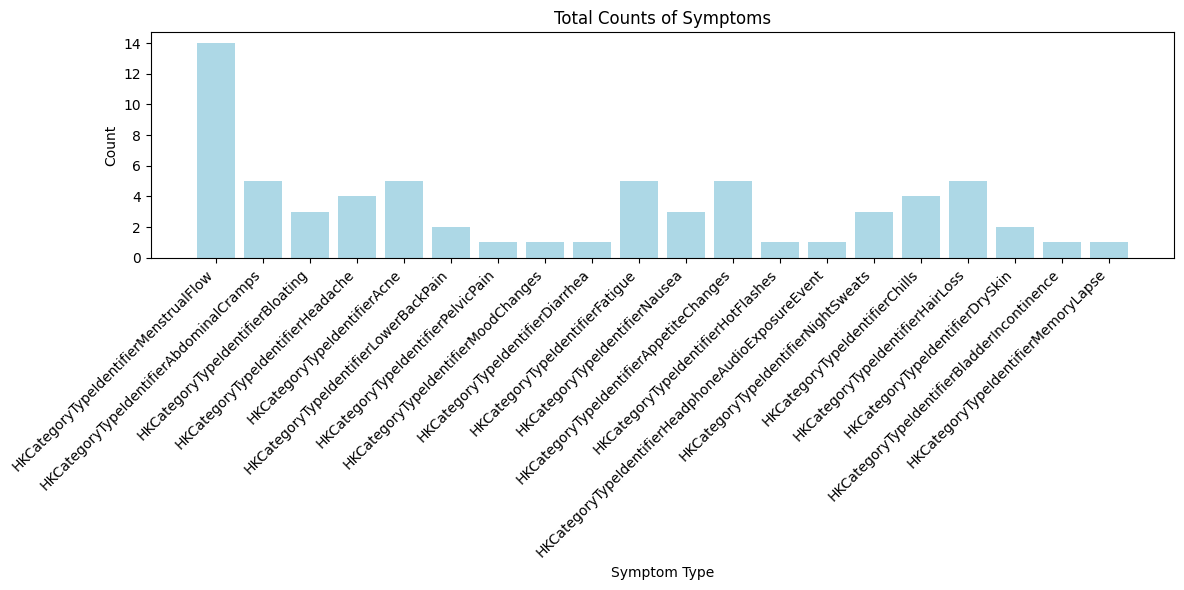

Symptom Counts by Type:
                                              Symptom  Count
0               HKCategoryTypeIdentifierMenstrualFlow     14
1             HKCategoryTypeIdentifierAbdominalCramps      5
2                    HKCategoryTypeIdentifierBloating      3
3                    HKCategoryTypeIdentifierHeadache      4
4                        HKCategoryTypeIdentifierAcne      5
5               HKCategoryTypeIdentifierLowerBackPain      2
6                  HKCategoryTypeIdentifierPelvicPain      1
7                 HKCategoryTypeIdentifierMoodChanges      1
8                    HKCategoryTypeIdentifierDiarrhea      1
9                     HKCategoryTypeIdentifierFatigue      5
10                     HKCategoryTypeIdentifierNausea      3
11            HKCategoryTypeIdentifierAppetiteChanges      5
12                 HKCategoryTypeIdentifierHotFlashes      1
13  HKCategoryTypeIdentifierHeadphoneAudioExposure...      1
14                HKCategoryTypeIdentifierNightSweats      3


In [12]:
import xml.etree.ElementTree as ET
import pandas as pd

def xml_file_to_dataframe(file_path):
    """
    Convert an XML file to a Pandas DataFrame.
    
    Args:
        file_path (str): Path to the XML file.

    Returns:
        pd.DataFrame: DataFrame with extracted data.
    """
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # List to hold parsed data
    records = []

    # Iterate through each <Record> in the XML
    for record in root.findall('Record'):
        record_data = {}
        
        # Extract attributes of the <Record>
        for attr, value in record.attrib.items():
            record_data[attr] = value
        
        # Extract metadata entries if present
        for metadata in record.findall('MetadataEntry'):
            key = metadata.get('key')
            value = metadata.get('value')
            record_data[key] = value

        # Add the parsed record to the list
        records.append(record_data)

    # Convert list of records into a DataFrame
    df = pd.DataFrame(records)
    return df

# Load XML data into a DataFrame
file_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with your XML file path
df = xml_file_to_dataframe(file_path)

# Ensure columns are aligned for DataFrame creation
df = df.fillna('Unknown')  # Fill missing values to avoid length mismatch

# Display unique symptom types
symptom_types = df['type'].unique()

# Organize symptoms by type
symptom_dict = {}
for symptom in symptom_types:
    symptom_dict[symptom] = len(df[df['type'] == symptom])  # Count occurrences for each type

# Create a DataFrame for visualization
symptom_df = pd.DataFrame(list(symptom_dict.items()), columns=['Symptom', 'Count'])

# Visualize symptoms
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.bar(symptom_df['Symptom'], symptom_df['Count'], color='lightblue')
plt.title("Total Counts of Symptoms")
plt.xlabel("Symptom Type")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("symptom_name")
plt.show()

# Print DataFrame for verification
print("Symptom Counts by Type:")
print(symptom_df)

/var/folders/x2/lvrpg7vx3x35t6cwtj7gfq2r0000gn/T/ipykernel_18117/2454527126.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menstrual_flow_df['startDate'] = pd.to_datetime(menstrual_flow_df['startDate'])
/var/folders/x2/lvrpg7vx3x35t6cwtj7gfq2r0000gn/T/ipykernel_18117/2454527126.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menstrual_flow_df['endDate'] = pd.to_datetime(menstrual_flow_df['endDate'])


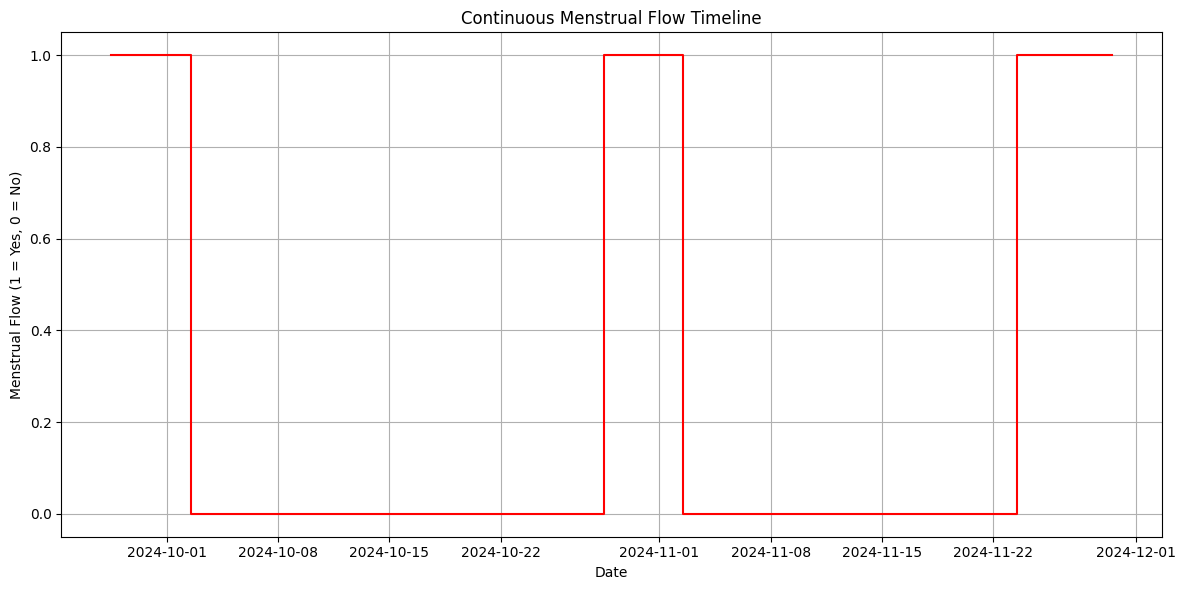

Continuous Menstrual Flow Timeline:
                        date  menstrual_flow
0  2024-09-27 12:00:00+03:00               1
1  2024-09-28 12:00:00+03:00               1
2  2024-09-29 12:00:00+03:00               1
3  2024-09-30 12:00:00+03:00               1
4  2024-10-01 12:00:00+03:00               1
..                       ...             ...
59 2024-11-25 12:00:00+03:00               1
60 2024-11-26 12:00:00+03:00               1
61 2024-11-27 12:00:00+03:00               1
62 2024-11-28 12:00:00+03:00               1
63 2024-11-29 12:00:00+03:00               1

[64 rows x 2 columns]


In [15]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def xml_file_to_dataframe(file_path):
    """
    Convert an XML file to a Pandas DataFrame.
    
    Args:
        file_path (str): Path to the XML file.

    Returns:
        pd.DataFrame: DataFrame with extracted data.
    """
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # List to hold parsed data
    records = []

    # Iterate through each <Record> in the XML
    for record in root.findall('Record'):
        record_data = {}
        
        # Extract attributes of the <Record>
        for attr, value in record.attrib.items():
            record_data[attr] = value
        
        # Extract metadata entries if present
        for metadata in record.findall('MetadataEntry'):
            key = metadata.get('key')
            value = metadata.get('value')
            record_data[key] = value

        # Add the parsed record to the list
        records.append(record_data)

    # Convert list of records into a DataFrame
    df = pd.DataFrame(records)
    return df

# Load the XML data
file_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with your XML file path
df = xml_file_to_dataframe(file_path)

# Filter the DataFrame for menstrual flow records
menstrual_flow_df = df[df['type'] == 'HKCategoryTypeIdentifierMenstrualFlow']

# Convert startDate and endDate to datetime objects
menstrual_flow_df['startDate'] = pd.to_datetime(menstrual_flow_df['startDate'])
menstrual_flow_df['endDate'] = pd.to_datetime(menstrual_flow_df['endDate'])

# Create a continuous timeline
start_date = menstrual_flow_df['startDate'].min()  # Start of timeline
end_date = menstrual_flow_df['endDate'].max()      # End of timeline
date_range = pd.date_range(start=start_date, end=end_date)

# Create a DataFrame with all days marked as 0 (no menstrual flow)
timeline_df = pd.DataFrame({'date': date_range, 'menstrual_flow': 0})

# Mark the days with menstrual flow as 1
for _, row in menstrual_flow_df.iterrows():
    timeline_df.loc[
        (timeline_df['date'] >= row['startDate']) & (timeline_df['date'] <= row['endDate']),
        'menstrual_flow'
    ] = 1

# Plot the continuous timeline
plt.figure(figsize=(12, 6))
plt.plot(timeline_df['date'], timeline_df['menstrual_flow'], drawstyle="steps-post", color='red')
plt.title("Continuous Menstrual Flow Timeline")
plt.xlabel("Date")
plt.ylabel("Menstrual Flow (1 = Yes, 0 = No)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the timeline DataFrame for verification
print("Continuous Menstrual Flow Timeline:")
print(timeline_df)

/var/folders/x2/lvrpg7vx3x35t6cwtj7gfq2r0000gn/T/ipykernel_18117/1040865696.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menstrual_flow_df['startDate'] = pd.to_datetime(menstrual_flow_df['startDate'])
/var/folders/x2/lvrpg7vx3x35t6cwtj7gfq2r0000gn/T/ipykernel_18117/1040865696.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menstrual_flow_df['endDate'] = pd.to_datetime(menstrual_flow_df['endDate'])


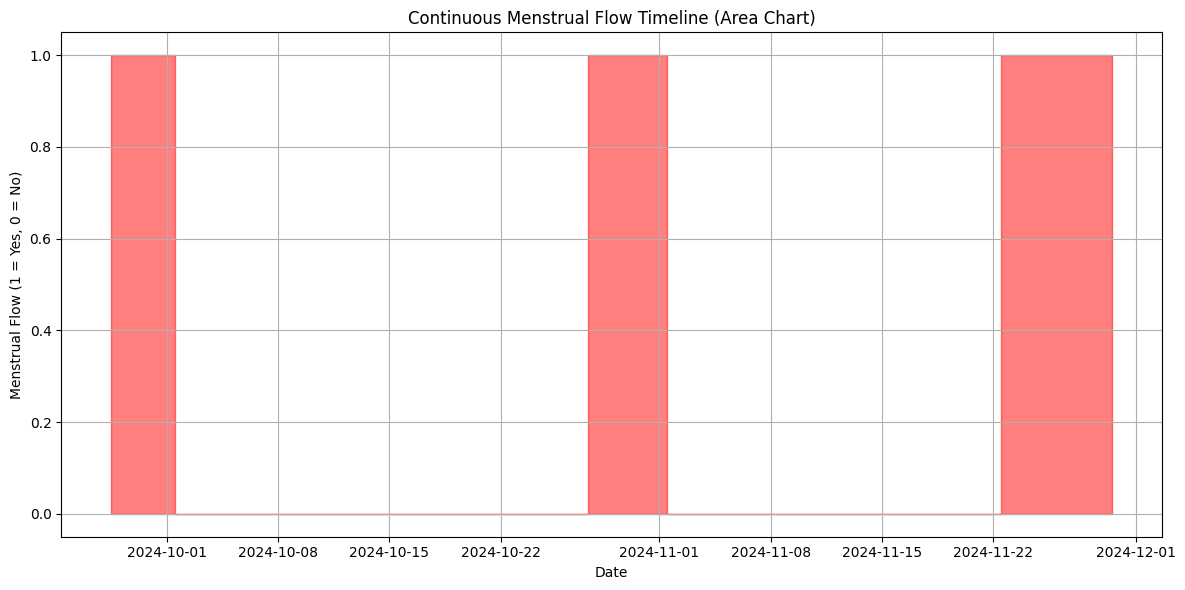

Continuous Menstrual Flow Timeline:
                        date  menstrual_flow
0  2024-09-27 12:00:00+03:00               1
1  2024-09-28 12:00:00+03:00               1
2  2024-09-29 12:00:00+03:00               1
3  2024-09-30 12:00:00+03:00               1
4  2024-10-01 12:00:00+03:00               1
..                       ...             ...
59 2024-11-25 12:00:00+03:00               1
60 2024-11-26 12:00:00+03:00               1
61 2024-11-27 12:00:00+03:00               1
62 2024-11-28 12:00:00+03:00               1
63 2024-11-29 12:00:00+03:00               1

[64 rows x 2 columns]


In [16]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def xml_file_to_dataframe(file_path):
    """
    Convert an XML file to a Pandas DataFrame.
    
    Args:
        file_path (str): Path to the XML file.

    Returns:
        pd.DataFrame: DataFrame with extracted data.
    """
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # List to hold parsed data
    records = []

    # Iterate through each <Record> in the XML
    for record in root.findall('Record'):
        record_data = {}
        
        # Extract attributes of the <Record>
        for attr, value in record.attrib.items():
            record_data[attr] = value
        
        # Extract metadata entries if present
        for metadata in record.findall('MetadataEntry'):
            key = metadata.get('key')
            value = metadata.get('value')
            record_data[key] = value

        # Add the parsed record to the list
        records.append(record_data)

    # Convert list of records into a DataFrame
    df = pd.DataFrame(records)
    return df

# Load the XML data
file_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with your XML file path
df = xml_file_to_dataframe(file_path)

# Filter the DataFrame for menstrual flow records
menstrual_flow_df = df[df['type'] == 'HKCategoryTypeIdentifierMenstrualFlow']

# Convert startDate and endDate to datetime objects
menstrual_flow_df['startDate'] = pd.to_datetime(menstrual_flow_df['startDate'])
menstrual_flow_df['endDate'] = pd.to_datetime(menstrual_flow_df['endDate'])

# Create a continuous timeline
start_date = menstrual_flow_df['startDate'].min()  # Start of timeline
end_date = menstrual_flow_df['endDate'].max()      # End of timeline
date_range = pd.date_range(start=start_date, end=end_date)

# Create a DataFrame with all days marked as 0 (no menstrual flow)
timeline_df = pd.DataFrame({'date': date_range, 'menstrual_flow': 0})

# Mark the days with menstrual flow as 1
for _, row in menstrual_flow_df.iterrows():
    timeline_df.loc[
        (timeline_df['date'] >= row['startDate']) & (timeline_df['date'] <= row['endDate']),
        'menstrual_flow'
    ] = 1

# Plot the continuous timeline using an area chart
plt.figure(figsize=(12, 6))
plt.fill_between(
    timeline_df['date'],
    timeline_df['menstrual_flow'],
    color='red',
    alpha=0.5,
    step="pre"
)
plt.title("Continuous Menstrual Flow Timeline (Area Chart)")
plt.xlabel("Date")
plt.ylabel("Menstrual Flow (1 = Yes, 0 = No)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Print the timeline DataFrame for verification
print("Continuous Menstrual Flow Timeline:")
print(timeline_df)

/var/folders/x2/lvrpg7vx3x35t6cwtj7gfq2r0000gn/T/ipykernel_18117/3644043492.py:52: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menstrual_flow_df['startDate'] = pd.to_datetime(menstrual_flow_df['startDate'])
/var/folders/x2/lvrpg7vx3x35t6cwtj7gfq2r0000gn/T/ipykernel_18117/3644043492.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  menstrual_flow_df['endDate'] = pd.to_datetime(menstrual_flow_df['endDate'])


Menstrual Flow Dates:
          date  menstrual_flow
0   2024-09-27               1
1   2024-09-28               1
2   2024-09-29               1
3   2024-09-30               1
4   2024-10-01               1
31  2024-10-28               1
32  2024-10-29               1
33  2024-10-30               1
34  2024-10-31               1
35  2024-11-01               1
57  2024-11-23               1
58  2024-11-24               1
59  2024-11-25               1
60  2024-11-26               1
61  2024-11-27               1
62  2024-11-28               1
63  2024-11-29               1


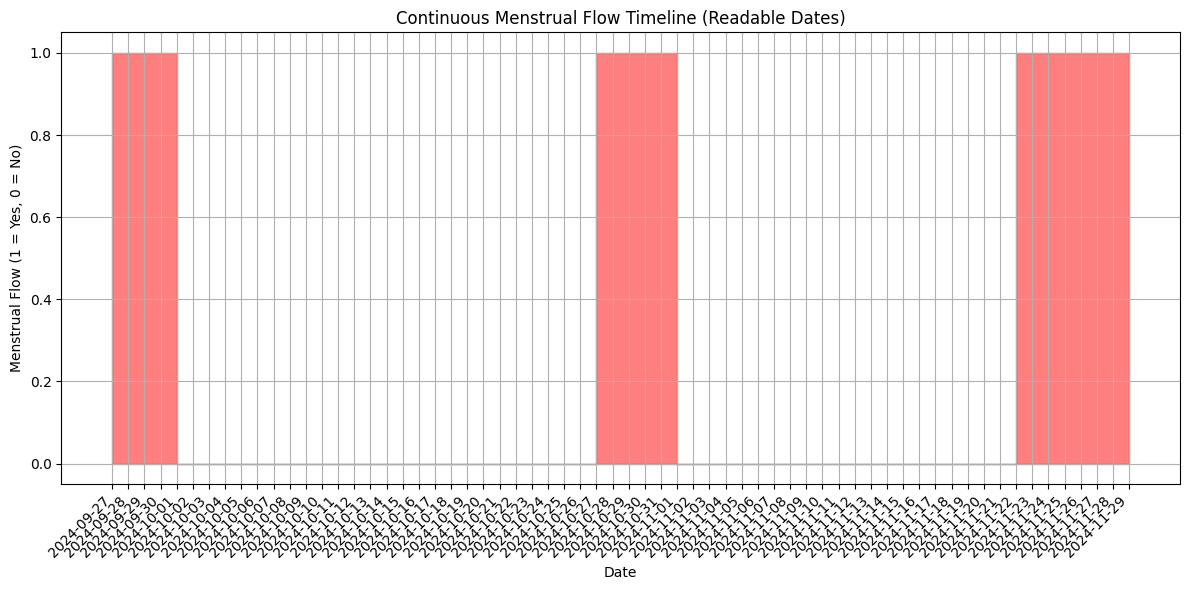

In [19]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

def xml_file_to_dataframe(file_path):
    """
    Convert an XML file to a Pandas DataFrame.
    
    Args:
        file_path (str): Path to the XML file.

    Returns:
        pd.DataFrame: DataFrame with extracted data.
    """
    # Parse the XML file
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # List to hold parsed data
    records = []

    # Iterate through each <Record> in the XML
    for record in root.findall('Record'):
        record_data = {}
        
        # Extract attributes of the <Record>
        for attr, value in record.attrib.items():
            record_data[attr] = value
        
        # Extract metadata entries if present
        for metadata in record.findall('MetadataEntry'):
            key = metadata.get('key')
            value = metadata.get('value')
            record_data[key] = value

        # Add the parsed record to the list
        records.append(record_data)

    # Convert list of records into a DataFrame
    df = pd.DataFrame(records)
    return df

# Load the XML data
file_path = "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"  # Replace with your XML file path
df = xml_file_to_dataframe(file_path)

# Filter the DataFrame for menstrual flow records
menstrual_flow_df = df[df['type'] == 'HKCategoryTypeIdentifierMenstrualFlow']

# Convert startDate and endDate to datetime objects
menstrual_flow_df['startDate'] = pd.to_datetime(menstrual_flow_df['startDate'])
menstrual_flow_df['endDate'] = pd.to_datetime(menstrual_flow_df['endDate'])

# Create a continuous timeline
start_date = menstrual_flow_df['startDate'].min()  # Start of timeline
end_date = menstrual_flow_df['endDate'].max()      # End of timeline
date_range = pd.date_range(start=start_date, end=end_date)

# Create a DataFrame with all days marked as 0 (no menstrual flow)
timeline_df = pd.DataFrame({'date': date_range, 'menstrual_flow': 0})

# Mark the days with menstrual flow as 1
for _, row in menstrual_flow_df.iterrows():
    timeline_df.loc[
        (timeline_df['date'] >= row['startDate']) & (timeline_df['date'] <= row['endDate']),
        'menstrual_flow'
    ] = 1

# Format dates to a readable format
timeline_df['date'] = timeline_df['date'].dt.strftime('%Y-%m-%d')

# Display menstrual flow dates in a readable format
print("Menstrual Flow Dates:")
flow_days = timeline_df[timeline_df['menstrual_flow'] == 1]
print(flow_days)

# Plot the continuous timeline using an area chart
plt.figure(figsize=(12, 6))
plt.fill_between(
    timeline_df['date'],
    timeline_df['menstrual_flow'],
    color='red',
    alpha=0.5,
    step="pre"
)
plt.title("Continuous Menstrual Flow Timeline (Readable Dates)")
plt.xlabel("Date")
plt.ylabel("Menstrual Flow (1 = Yes, 0 = No)")
plt.xticks(rotation=45, ha='right')  # Rotate dates for better readability
plt.grid(True)
plt.tight_layout()
plt.savefig("menstrual_flow_dates")
plt.show()

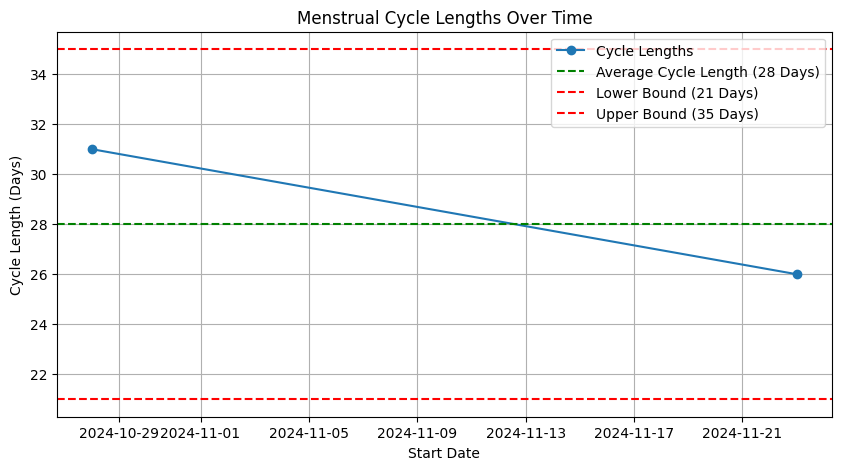

Summary Statistics for Cycle Lengths:
count     2.000000
mean     28.500000
std       3.535534
min      26.000000
25%      27.250000
50%      28.500000
75%      29.750000
max      31.000000
Name: Cycle Length (Days), dtype: float64

Irregular Cycles (Length < 21 or > 35 Days):
Empty DataFrame
Columns: [Start Date, Cycle Length (Days)]
Index: []


In [2]:
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt

# Path to your XML file
file_path =  "/Users/ipekaksoy/Desktop/DSA210_project_ipek/data/mensturalcycledata.xml"   # Replace with your file path

# Parse the XML file
tree = ET.parse(file_path)
root = tree.getroot()

# Extract menstrual cycle start dates
start_dates = []
for record in root.findall("Record"):
    if record.get("type") == "HKCategoryTypeIdentifierMenstrualFlow":
        for metadata in record.findall("MetadataEntry"):
            if metadata.get("key") == "HKMenstrualCycleStart" and metadata.get("value") == "1":
                start_date = record.get("startDate").split(" ")[0]  # Extract only the date
                start_dates.append(start_date)

# Convert to DataFrame and sort dates
df = pd.DataFrame({"Start Date": pd.to_datetime(start_dates)})
df = df.sort_values("Start Date").reset_index(drop=True)

# Calculate cycle lengths
df["Cycle Length (Days)"] = df["Start Date"].diff().dt.days

# Descriptive statistics
summary_stats = df["Cycle Length (Days)"].describe()

# Identify irregular cycles (e.g., cycle length < 21 or > 35 days)
irregular_cycles = df[(df["Cycle Length (Days)"] < 21) | (df["Cycle Length (Days)"] > 35)]

# Visualize the cycle lengths
plt.figure(figsize=(10, 5))
plt.plot(df["Start Date"], df["Cycle Length (Days)"], marker="o", label="Cycle Lengths")
plt.axhline(y=28, color="green", linestyle="--", label="Average Cycle Length (28 Days)")
plt.axhline(y=21, color="red", linestyle="--", label="Lower Bound (21 Days)")
plt.axhline(y=35, color="red", linestyle="--", label="Upper Bound (35 Days)")
plt.title("Menstrual Cycle Lengths Over Time")
plt.xlabel("Start Date")
plt.ylabel("Cycle Length (Days)")
plt.legend()
plt.grid(True)
plt.show()

# Display results
print("Summary Statistics for Cycle Lengths:")
print(summary_stats)
print("\nIrregular Cycles (Length < 21 or > 35 Days):")
print(irregular_cycles)